# KMEANS - minimise WCSS(Within Cluster Sum of squares) 

In [70]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('universities.csv')
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   SAT       25 non-null     int64 
 2   Top10     25 non-null     int64 
 3   Accept    25 non-null     int64 
 4   SFRatio   25 non-null     int64 
 5   Expenses  25 non-null     int64 
 6   GradRate  25 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


In [5]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [6]:
df[df.duplicated]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate


In [7]:
df.isnull().sum()

Univ        0
SAT         0
Top10       0
Accept      0
SFRatio     0
Expenses    0
GradRate    0
dtype: int64

<Axes: xlabel='SAT', ylabel='Count'>

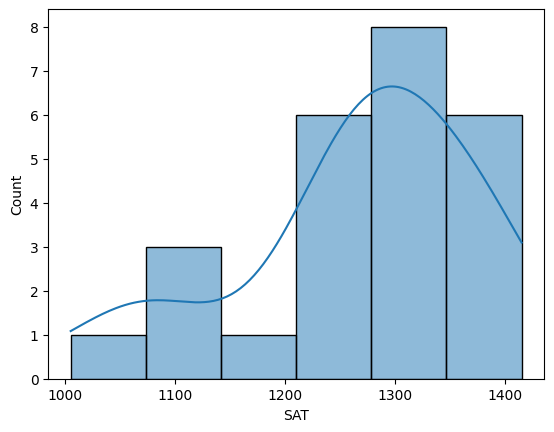

In [8]:
import seaborn as sns
sns.histplot(df['SAT'],kde = True)

<Axes: >

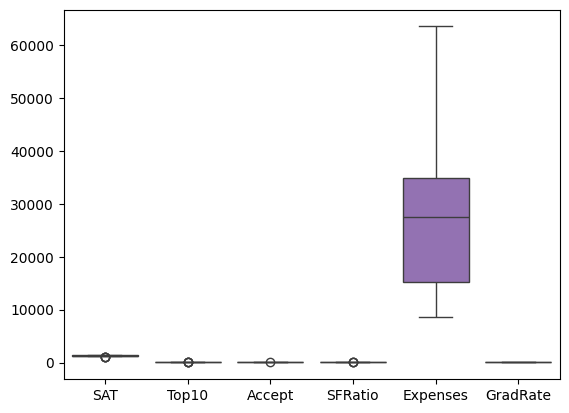

In [9]:
sns.boxplot(df)

In [10]:
df = df.drop('Univ',axis = 1)

In [11]:
cols = df.columns

In [12]:
#standard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = cols)
df_scaled

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


In [13]:
# finding optimal n , using elbow point
wcss =[]
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,random_state = 0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
wcss

[150.0,
 64.1452839501027,
 49.69054164653248,
 34.79612750585774,
 28.96866904732409,
 25.012005085561192,
 22.05883596374174,
 17.503463690174218,
 14.550294568354765,
 11.534641754172172,
 9.913351835524065,
 8.82180724462987,
 7.105666946966512,
 6.111091911814865,
 3.6133492318650804,
 2.9298229590953895,
 2.601273981139518,
 2.119913989807651,
 1.6797535810239919]

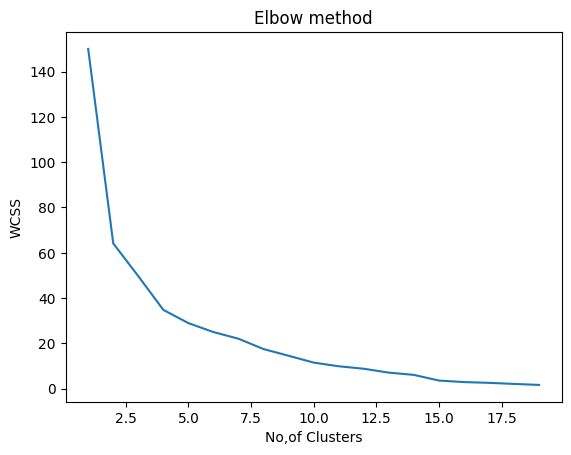

In [14]:
plt.plot(range(1,20),wcss)
plt.title('Elbow method')
plt.xlabel('No,of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
cluster_new = KMeans(3,random_state = 0)
cluster_new.fit(df_scaled)

KMeans(n_clusters=3, random_state=0)

In [16]:
cluster_new.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1], dtype=int32)

In [17]:
set(cluster_new.labels_)

{0, 1, 2}

In [18]:
df['clusterid'] = cluster_new.labels_
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid
0,1310,89,22,13,22704,94,1
1,1415,100,25,6,63575,81,2
2,1260,62,59,9,25026,72,1
3,1310,76,24,12,31510,88,1
4,1280,83,33,13,21864,90,1
5,1340,89,23,10,32162,95,1
6,1315,90,30,12,31585,95,1
7,1255,74,24,12,20126,92,1
8,1400,91,14,11,39525,97,1
9,1305,75,44,7,58691,87,2


In [19]:
df.sort_values(by = 'clusterid')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid
20,1180,65,68,16,15470,85,0
17,1075,49,67,25,8704,67,0
15,1005,28,90,19,9066,69,0
13,1081,38,54,18,10185,80,0
23,1085,40,69,15,11857,71,0
0,1310,89,22,13,22704,94,1
22,1225,77,44,14,13349,92,1
21,1285,80,36,11,27553,90,1
19,1290,75,50,13,38380,87,1
18,1240,95,40,17,15140,78,1


In [20]:
#interpretation of clusters


In [21]:
df.groupby('clusterid').mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clusterid,,,,,,
0,1085.200000,44.000000,69.600000,18.600000,11056.400000,74.400000
1,1306.388889,84.277778,31.277778,11.777778,28175.111111,90.444444
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


In [22]:
df[df['clusterid'] == 0]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid
13,1081,38,54,18,10185,80,0
15,1005,28,90,19,9066,69,0
17,1075,49,67,25,8704,67,0
20,1180,65,68,16,15470,85,0
23,1085,40,69,15,11857,71,0


In [23]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled,cluster_new.labels_,metric='euclidean')
score

0.41616499740070767

## BREAST CANCER

In [72]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
df[df.duplicated]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [74]:
df1 = df.drop('diagnosis',axis = 1)
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [75]:
cols = df1.columns
#standard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df1),columns = cols)
df_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [76]:
cluster_new = KMeans(2,random_state = 1)
cluster_new.fit(df_scaled)

KMeans(n_clusters=2, random_state=1)

In [77]:
cluster_new.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [78]:
df1['clusterid'] =  cluster_new.labels_
df1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusterid
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [79]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled,cluster_new.labels_,metric='euclidean')
score

0.3447344346611054

In [80]:
#compare diagnosis and cluster id
df1['diagnosis'] = df['diagnosis'].map({"M":0,"B":1})
df1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusterid,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,0


In [81]:
(df1['clusterid'] != df1['diagnosis']).sum()

50

# DB SCAN

In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Cars.csv')
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
a1 = df.values
a1[0:5]

array([[ 49.        ,  53.70068138,  89.        , 104.1853528 ,
         28.7620589 ],
       [ 55.        ,  50.01340115,  92.        , 105.4612635 ,
         30.46683298],
       [ 55.        ,  50.01340115,  92.        , 105.4612635 ,
         30.19359657],
       [ 70.        ,  45.69632238,  92.        , 113.4612635 ,
         30.63211391],
       [ 53.        ,  50.50423183,  92.        , 104.4612635 ,
         29.88914864]])

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(a1)

In [26]:
dbscan = DBSCAN(eps = 1.5,min_samples = 3)
clusters = dbscan.fit_predict(X)
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0])

In [27]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0])

In [28]:
df['clusterid'] = clusters
df

,HP,MPG,VOL,SP,WT,clusterid
0,49,53.700681,89,104.185353,28.762059,0
1,55,50.013401,92,105.461264,30.466833,0
2,55,50.013401,92,105.461264,30.193597,0
3,70,45.696322,92,113.461264,30.632114,0
4,53,50.504232,92,104.461264,29.889149,0
...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,-1
77,238,19.197888,115,150.576579,37.923113,0
78,263,34.000000,50,151.598513,15.769625,-1
79,295,19.833733,119,167.944460,39.423099,0


In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components = 2)
data = pca.fit_transform(a1)
pca_components = pd.DataFrame(data,columns = ['pc1','pc2'])
pca_components

,pc1,pc2
0,-72.737677,-9.384282
1,-66.091277,-5.772688
2,-66.094826,-5.858049
3,-49.254908,-5.890969
4,-68.318068,-5.915206
...,...,...
76,206.147792,-63.837756
77,125.505554,11.959934
78,145.348513,-59.694309
79,184.656836,12.429399


In [31]:
pca_components['clusterid'] = clusters
pca_components

,pc1,pc2,clusterid
0,-72.737677,-9.384282,0
1,-66.091277,-5.772688,0
2,-66.094826,-5.858049,0
3,-49.254908,-5.890969,0
4,-68.318068,-5.915206,0
...,...,...,...
76,206.147792,-63.837756,-1
77,125.505554,11.959934,0
78,145.348513,-59.694309,-1
79,184.656836,12.429399,0


<Axes: xlabel='pc1', ylabel='pc2'>

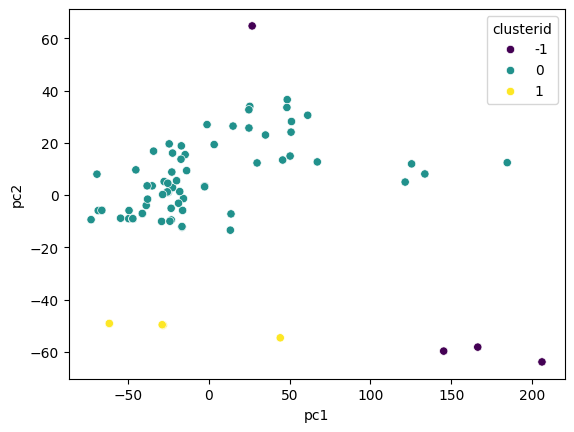

In [32]:
sns.scatterplot(data = pca_components,x='pc1',y='pc2',hue = 'clusterid',palette = 'viridis')

## identify the outlier

In [33]:
noise_indices = pca_components.index[pca_components['clusterid'] == -1 ].tolist()
print("Indices pf noise points(-1):",noise_indices)

Indices pf noise points(-1): [70, 73, 76, 78]


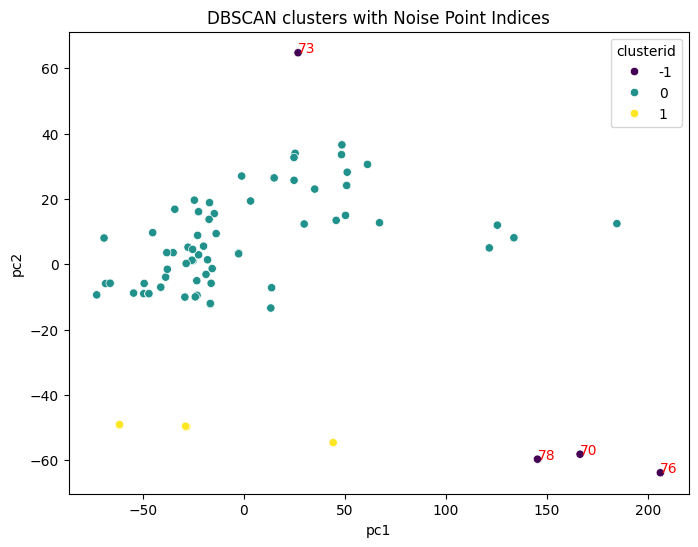

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = pca_components,x='pc1',y='pc2',hue='clusterid'
                ,palette = 'viridis',legend = 'full')
#highlight noise
for i in noise_indices:
    plt.text(pca_components.loc[i,'pc1'],pca_components.loc[i,'pc2'],str(i),color = 'red',fontsize = 10)
plt.title("DBSCAN clusters with Noise Point Indices")
plt.show()

#### categorical
#### jaquards coefficient

## MOVIE RECOMMENDATION USER BASED